In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Select only the date and prcp values.
# Load the query results into a Pandas DataFrame and set the index to the date column.
# Sort the DataFrame values by date.
# Plot the results using the DataFrame plot method.
Measurement.__table__.columns.keys() 

['id', 'station', 'date', 'prcp', 'tobs']

In [11]:
# measurement_Q = session.query(Measurement.date, Measurement.prcp).order_by(Measurement.date).all()
# m_df = pd.DataFrame(measurement_Q, columns=['Date','Precipitation'])
# m_df.set_index('Date', inplace=True)

# m_df.plot()

In [12]:
# m_df.describe()

In [13]:
#Getting the date for 1 year ago.
last_day = session.query(func.max(Measurement.date)).all()[0][0]
last_day_dt = dt.datetime.strptime(last_day,'%Y-%m-%d')

year_ago = last_day_dt - dt.timedelta(days=366)
year_ago_str = year_ago.strftime("%Y-%m-%d")

In [14]:
last_day

'2017-08-23'

In [15]:
year_ago_str

'2016-08-22'

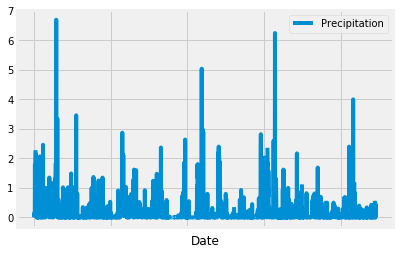

In [16]:
# Calculate the date 1 year ago from the last data point in the database
measurement_Q_prcp = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > year_ago_str).\
order_by(Measurement.date).all()

m_df = pd.DataFrame(measurement_Q_prcp, columns=['Date','Precipitation'])
m_df.set_index('Date', inplace=True)

m_df.tail()
# Use Pandas Plotting with Matplotlib to plot the data
m_df.plot()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
m_df = m_df.dropna(how='any')
m_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [18]:
#Let me just remind myself what the column keys are again
Station.__table__.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [19]:
Measurement.__table__.columns.keys()

['id', 'station', 'date', 'prcp', 'tobs']

In [20]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(Station.id)).all()

[(9)]

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

from sqlalchemy import desc

session.query(Station.station, func.count(Measurement.station)).\
filter(Measurement.station == Station.station).\
group_by(Station.station).\
order_by(desc(func.count(Measurement.station))).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
#The code below is for the segment of min, max, avg.
#My min has one extra record lower, my max has one extra record higher.
#dropNA was used earlier to remove all rows with missing information on any of the rows.
#But in this case, the row with 53 degrees minimum is a valid row. 

session.query(func.min(Measurement.tobs), Measurement.date, Measurement.station, Measurement.id, Measurement.prcp).all()

[(53.0, '2013-04-02', 'USC00511918', 16123, 0.0)]

In [23]:
#Numbers are off by 1 from the answer key below. 
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.tobs.isnot(None)).\
all()

[(53.0, 87.0, 73.09795396419437)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [26]:
#Ok, lets find the station with the highest number of temperature observations.
stations_and_temperature_observations = session.query(func.count(Measurement.tobs), Measurement.station).\
filter(Measurement.date > year_ago_str).\
group_by(Measurement.station).\
order_by(desc(func.count(Measurement.tobs))).\
all()

stations_and_temperature_observations
# USC00519397 has the most. 

[(361, 'USC00519397'),
 (352, 'USC00519281'),
 (349, 'USC00516128'),
 (343, 'USC00513117'),
 (337, 'USC00519523'),
 (305, 'USC00514830'),
 (183, 'USC00517948')]

In [27]:
station_with_the_most_observations = stations_and_temperature_observations[0][1]
station_with_the_most_observations

'USC00519397'

In [28]:
#NOTE TO WHOMEVER IS GRADING THIS HOMEWORK:
#By the query above, USC00519397 is the station with the most TOBS records.
#However, the homework answer graph uses USC00519281 instead. 
#I'm going to use the wrong one to get the image that was shown in the readme but the
#correct station should be the one ending in 97, not 81.

#This is the right one:
# measurement_Q_temp = session.query(Measurement.tobs).\
# filter(Measurement.date > year_ago_str).\
# filter(Measurement.station == 'USC00519397').\
# all()

measurement_Q_temp = session.query(Measurement.tobs).\
filter(Measurement.date > year_ago_str).\
filter(Measurement.station == 'USC00519281').\
all()

In [29]:
m_df_2 = pd.DataFrame(measurement_Q_temp, columns=['Temperature'])
m_df_2 = m_df_2.dropna(how='any')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122a0cf60>]],
      dtype=object)

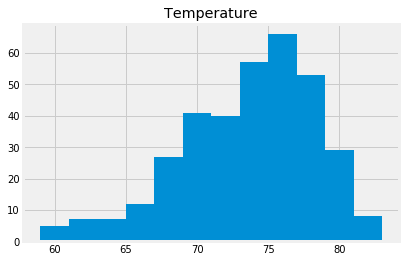

In [30]:
#plotting the graph
m_df_2.hist(bins=12)

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.kym-cdn.com/entries/icons/original/000/029/847/cover4.jpg")


In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

